In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()


def getWeathbyZip(zipCode):
    zipCodestr = str(zipCode)
    try:
        return search.by_zipcode(zipCodestr)["Wealthy"]
    except:
        return ""



#search.by_zipcode("08817")["Wealthy"]

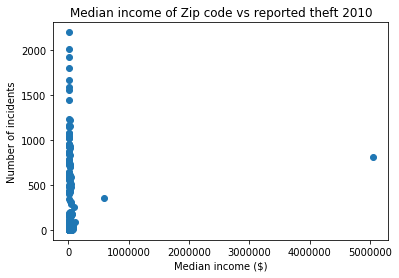

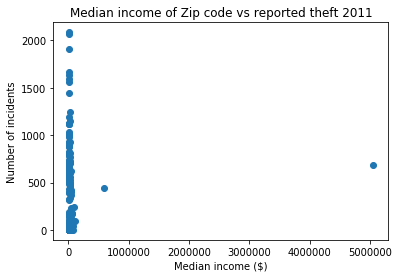

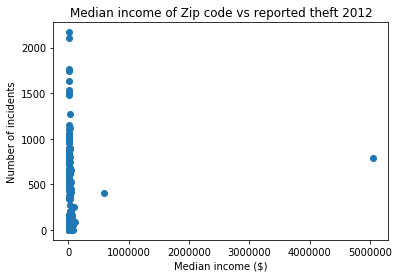

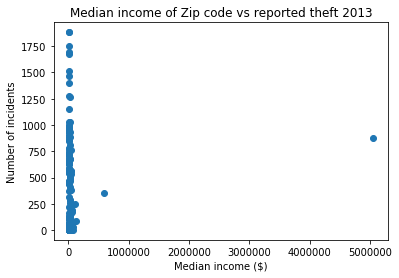

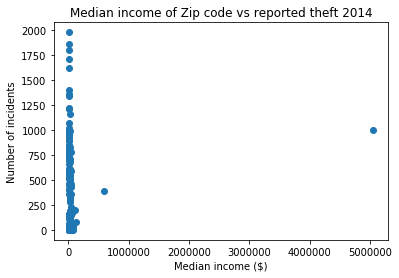

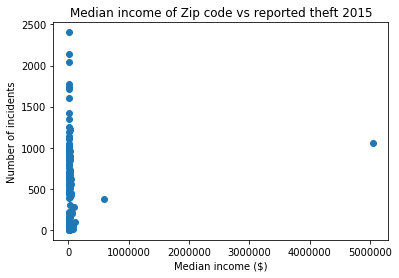

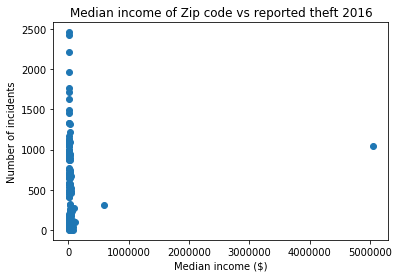

In [103]:
# Get a dataFrame, NYC , 2010

years = ["2010","2011","2012","2013","2014","2015","2016"]

for year in years:
    crimeType = "Theft"
    city = "LA"
    df_NYC_2010 = pd.read_csv(year+"_"+city+"_Crimes.csv")
    df_NYC_key = pd.read_csv(city+"_Type_Key.csv")
    df_NYC_2010 = df_NYC_2010.set_index("Crime Code Description").join(df_NYC_key.set_index("Description"),how="inner")
    df_NYC_2010 = df_NYC_2010.reset_index().rename(columns={"index":"Crime Code Description"})

    df_NYC_ZipCode = pd.DataFrame({"Zip code":df_NYC_2010["Zip code"].unique()})
    df_NYC_ZipCode = df_NYC_ZipCode[[len(str(item))>4 for item in list(df_NYC_ZipCode['Zip code']) ]]
    df_NYC_ZipCode["Median income"] = df_NYC_ZipCode["Zip code"].map(getWeathbyZip)
    df_NYC_2010 = df_NYC_2010.set_index("Zip code").join(df_NYC_ZipCode.set_index("Zip code"),how="inner").reset_index()
    df_NYC_2010[["Zip code","Type","Median income"]][df_NYC_2010["Type"]==crimeType].set_index("Zip code").drop_duplicates().dropna().head()

    df_NYC_2010_Assault = df_NYC_2010[["Zip code","Type","Median income"]][df_NYC_2010["Type"]==crimeType].set_index("Zip code").drop_duplicates().replace(np.inf,np.nan).dropna()
    df_NYC_2010_zipvsAssault = df_NYC_2010.groupby(["Zip code","Type"]).count()["Crime Code Description"].unstack()[crimeType]

    df_NYC_zipcodeAssaultMedianIncome = df_NYC_ZipCode.set_index("Zip code").join(pd.DataFrame(df_NYC_2010_zipvsAssault),how="inner")

    df_NYC_zipcodeAssaultMedianIncome = df_NYC_zipcodeAssaultMedianIncome.dropna()
    plt.scatter(df_NYC_zipcodeAssaultMedianIncome["Median income"],df_NYC_zipcodeAssaultMedianIncome[crimeType])
    #plt.xlim([0,125000])
    plt.title("Median income of Zip code vs reported "+crimeType.lower()+" "+year)
    plt.xlabel("Median income ($)")
    plt.ylabel("Number of incidents")
    plt.savefig(year+"_"+city+"_"+crimeType+".png",dpi=600)
    plt.show()
    plt.close()

In [116]:
df_NYC_ZipCode = df_NYC_ZipCode[[len(str(item))>4 for item in list(df_NYC_ZipCode['Zip code']) ]]